In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
raw_data = pd.read_csv('real_estate_price_size_year_view.csv.csv')

In [6]:
raw_data

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


mapping yes as 1 and no as 0

In [8]:
data = raw_data.copy()
data['view'] = data['view'].map({'Sea view' : 1, 'No sea view': 0})
data

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1
...,...,...,...,...
95,252460.400,549.80,2009,1
96,310522.592,1037.44,2009,0
97,383635.568,1504.75,2006,0
98,225145.248,648.29,2015,0


In [9]:
data.describe()

,price,size,year,view
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


## Regression

In [14]:
y = data['price']
x1 = data[['view', 'size']]

In [17]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     374.4
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           2.44e-46
Time:                        13:01:44   Log-Likelihood:                -1158.3
No. Observations:                 100   AIC:                             2323.
Df Residuals:                      97   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.748e+04   8337.182      9.294      0.000    6.09e+04     9.4e+04
view        5.756e+04   5278.883     10.904      0.000    4.71e+04     6.8e+04
size         218.7521      8.902     24.574      0.000     201.085     236.420
==============================================================================
Omnibus:                       24.354   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.619
Skew:                           0.896   Prob(JB):                     2.27e-12
Kurtosis:                       6.107   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

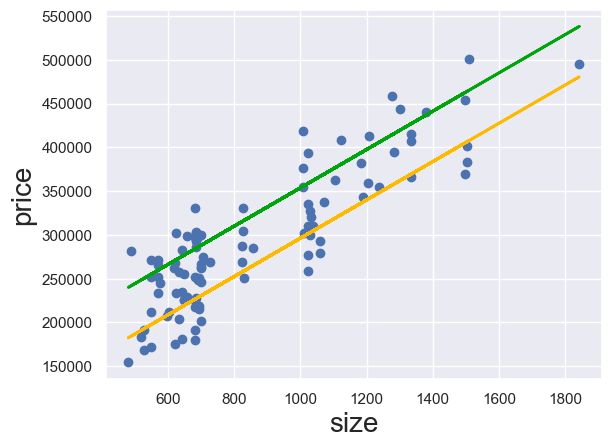

In [19]:
plt.scatter(data['size'],y)
yhat_no = 7.748e+04 + 218.7521*data['size']
yhat_yes = 5.756e+04 + 7.748e+04 + 218.7521*data['size']
fig = plt.plot(data['size'], yhat_no, lw=2, c='#fcba03')  #yellow
fig = plt.plot(data['size'], yhat_yes, lw=2, c='#00a50e') #green
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show

## PREDICTIONS

In [20]:
x

,const,view,size
0,1.0,0,643.09
1,1.0,0,656.22
2,1.0,1,487.29
3,1.0,0,1504.75
4,1.0,1,1275.46
...,...,...,...
95,1.0,1,549.80
96,1.0,0,1037.44
97,1.0,0,1504.75
98,1.0,0,648.29


In [30]:
new_data = pd.DataFrame ({'const':1, 'size':[0,0], 'view':[0,1]})
new_data = new_data[['const', 'size', 'view']]
predictions = results.predict(new_data)
predictions

0    77484.306406
1    77703.058510
dtype: float64

In [31]:
predictionsdf = pd.DataFrame({'Predictions': predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0 : 'House 1', 1 : 'house 2'})

,const,size,view,Predictions
House 1,1,0,0,77484.306406
house 2,1,0,1,77703.058510
